<a href="https://colab.research.google.com/github/AnhHao552001/BT-ANN_CNN/blob/main/BT_Tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [6]:
# Load Data 
with open('data.Tien', 'rb') as f:
    (x_train, y_train) = pickle.load(f)
# Reshape Data
x_pre_0 = x_train[2]
x_pre_1 = x_train[11]
x_pre_2 = x_train[25]
x_pre_3 = x_train[35]
x_pre_4 = x_train[47]
x_pre_5 = x_train[51]
x_pre_6 = x_train[66]
x_pre_7 = x_train[72]
x_pre_8 = x_train[88]
x_pre_9 = x_train[92]
x_pre_10 = x_train[102]
x_pre_11 = x_train[112]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 27s 6s/step - loss: 5.9765 - acc: 0.0729 - val_loss: 4.6402 - val_acc: 0.1250
Epoch 2/15
2/2 [==============================] - 15s 7s/step - loss: 4.4044 - acc: 0.0729 - val_loss: 2.6483 - val_acc: 0.0833
Epoch 3/15
2/2 [==============================] - 14s 5s/step - loss: 2.5038 - acc: 0.0938 - val_loss: 2.4646 - val_acc: 0.0833
Epoch 4/15
2/2 [==============================] - 12s 5s/step - loss: 2.3459 - acc: 0.2292 - val_loss: 2.3214 - val_acc: 0.0833
Epoch 5/15
2/2 [==============================] - 12s 5s/step - loss: 2.2135 - acc: 0.2396 - val_loss: 2.2583 - val_acc: 0.1250
Epoch 6/15
2/2 [==============================] - 12s 5s/step - loss: 2.0051 - acc: 0.2917 - val_loss: 2.1586 - val_acc: 0.2083
Epoch 7/15
2/2 [==============================] - 12s 5s/step - loss: 1.7178 - acc: 0.3646 - val_loss: 1.7852 - val_acc: 0.3333
Epoch 8/15
2/2 [==============================] - 13s 5s/step - loss: 1.4380 - acc: 0.6042 - val_loss: 2

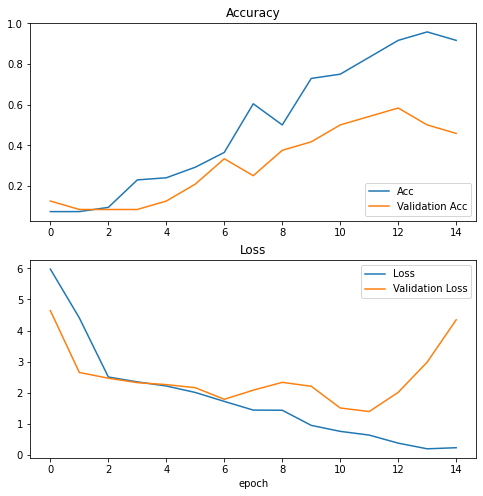

In [7]:
# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255
# Encoding Y
y_train = np_utils.to_categorical(y_train, 12)
# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(12, activation='softmax'))
model.summary()
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_split = 0.2)
f1 = history.history['acc']
val_f1 = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(f1, label='Acc')
plt.plot(val_f1, label='Validation Acc')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.xlabel('epoch')
plt.show()
label = [ '100 dong', '200 dong', '500 dong','1000 dong','2000 dong','5000 dong','10000 dong','20000 dong','50000 dong','100000 VND','200000 VND','500000 VND']

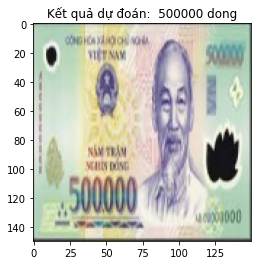

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_11.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_11, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

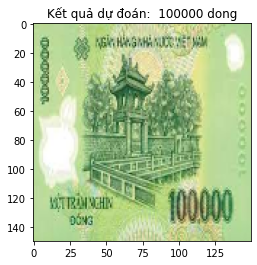

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_9.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_9, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

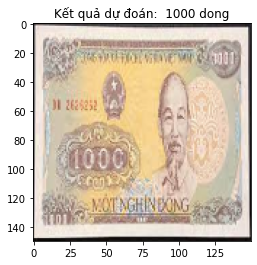

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_3.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_3, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

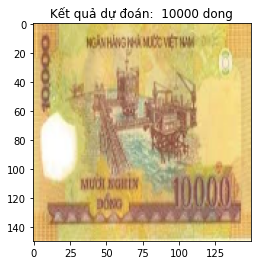

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_6.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_6, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

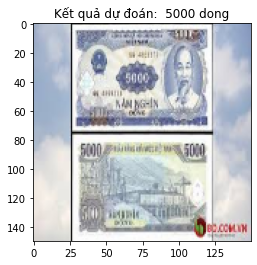

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_5.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_5, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

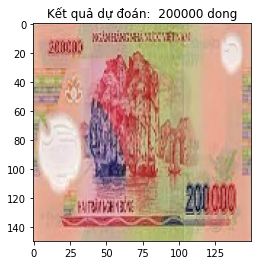

In [ ]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_10.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_10, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

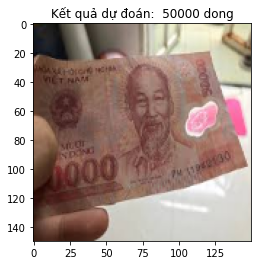

In [11]:
plt.title("Kết quả dự đoán:  " + label[np.argmax(model.predict(x_pre_8.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_8, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))